# هیستوگرام 

نمودار یا گراف نشان دهنده میزان روشنایی پیکسل های تصویر

hist = cv2.calcHist([images],[channels],mask,[histSize],[ranges])

[images]=تصویر یا تصاویر ورودی

[channels]=شماره کانال یا کانال های ورودی

mask=پارامتر دلخواهی که اجازه میدهد هیستوگرام برای قسمت خاصی از تصویر اعمال شود

[histSize]=تعداد بلوک های محور افق

[ranges]=محدوده مجاز برای اندازه گیری روشنایی کانال ها


# محاسبه و نمایش هیستوگرام یک بعدی

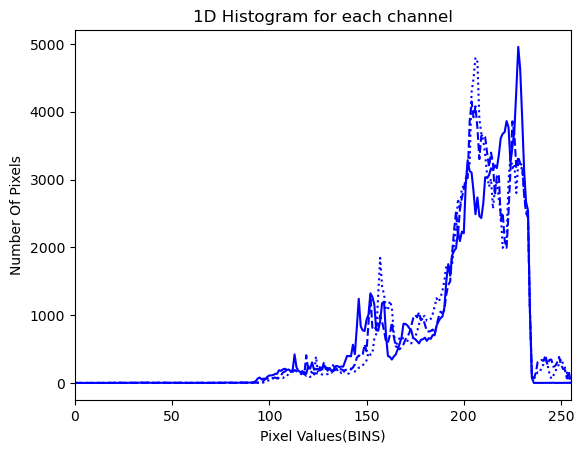

In [5]:
import cv2
import numpy as np
import imutils as im
from matplotlib import pyplot as plt

img = cv2.imread("s.png")
cv2.imshow("Image",img)

x = plt.figure()
plt.title("1D Histogram for each channel")
plt.xlabel("Pixel Values(BINS)")
plt.ylabel("Number Of Pixels")
lines = ["-","--",":"]
for i in range(3):
    hist = cv2.calcHist([img],[i],None,[256],[0,255])
    plt.plot(hist,color="b",linestyle=lines[i])
    plt.xlim([0,255])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

# محاسبه ونمایش هیستوگرام 2 بعدی

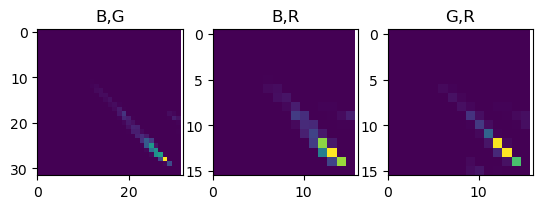

In [5]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("s.png")
cv2.imshow("Image",img)
plt.figure()

hist1 = cv2.calcHist([img],[0,1],None,[32,32],[0,255,0,255])
hist2 = cv2.calcHist([img],[0,2],None,[16,16],[0,255,0,255])
hist3 = cv2.calcHist([img],[1,2],None,[16,16],[0,255,0,255])
plt.subplot(131),plt.title("B,G"),plt.imshow(hist1),plt.xlim([0,32])
plt.subplot(132),plt.title("B,R"),plt.imshow(hist2),plt.xlim([0,16])
plt.subplot(133),plt.title("G,R"),plt.imshow(hist3),plt.xlim([0,16])


plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

# (کنتراست)متعادل سازی هیستوگرام

گسترش هیستوگرام درتمام طول محور افقی به جهت افزایش روشنایی وفهم تصویر

دراین روش ابتدا هیستوگرام تصویر خاکستری محاسبه ونرمالیزه میشودسپس انتگرال هیستوگرام را محاسبه و از آن به عنوان یک تبدیل به منظور اصلاح کنتراست استفاده میکنیم 

# متعادل سازی معمولی

dst = cv2.equalizeHist(grayImage)

grayImage = تصویر ورودی که باید 8 بیتی و خاکستری باشد

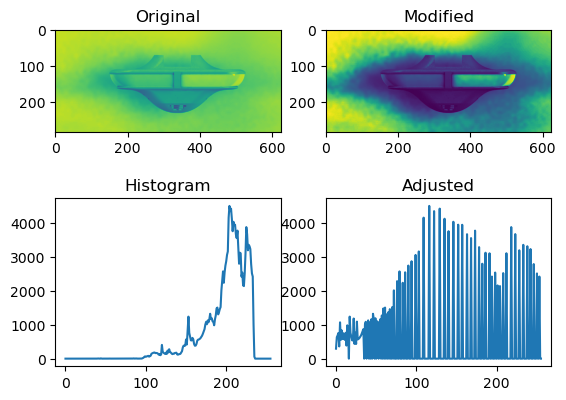

In [1]:
import cv2
from matplotlib import pyplot as plt

img_gray = cv2.imread("s.png")
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(img_gray)
cv2.imshow("s",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_hist = cv2.calcHist([img_gray],[0],None,[256],[0,255])
dst_hist = cv2.calcHist([dst],[0],None,[256],[0,255])

plt.subplot(221),plt.imshow(img_gray),plt.title("Original")
plt.subplot(222),plt.imshow(dst),plt.title("Modified")
plt.subplot(223),plt.plot(img_hist),plt.title("Histogram")
plt.subplot(224),plt.plot(dst_hist),plt.title("Adjusted")

plt.show()


در این روش چون روشنایی بیش از حد اعمال میشود جزییات قسمت هایی از پیش زمینه حذف میشود

# متعادل سازی تطبیقی

این الگوریتم تصویر را به بخش های کوچکی به نام کاشی تقسیم میکند سپس کنتراست هر کدام را جداگانه محاسبه میکنددر پایان با توزیع غیرخطی حاشیه ایجاد شده بین کاشی ها را ازبین میبرد

CLAHE = cv2.creatCLAHE(clipLimit,tileGridSize)

clipLimit=مقدار مجاز برای کنتراست هرکاشی که اجازه نمیدهد روشنایی از یک حدی بیشتر شودپیشفرض40 

tileGridSize=اندازه کاشی ها را مشخص میکند پیشفرض 8 در 8

 را روی تصویر اعمال میکنیمCLAHEسپس 
    
CLAHE.apply(gray)

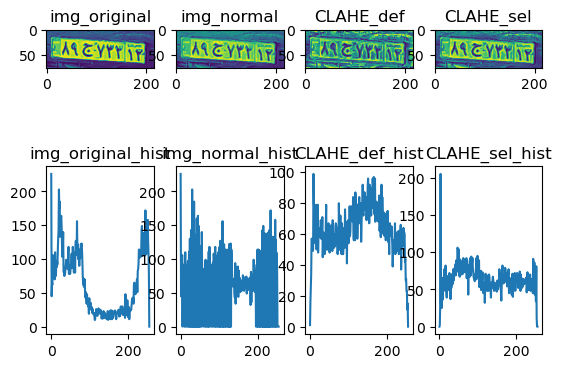

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pelak3.png")

img_original = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_normal = cv2.equalizeHist(img_original)

CLAHE_defult = cv2.createCLAHE()
CLAHE_def = CLAHE_defult.apply(img_original)

CLAHE_select = cv2.createCLAHE(3.0,(5,5))
CLAHE_sel = CLAHE_select.apply(img_original)

#histcalc###################################################################
hist1=cv2.calcHist([img_original],[0],None,[256],[0,255])
hist2=cv2.calcHist([img_normal],[0],None,[256],[0,255])
hist3=cv2.calcHist([CLAHE_def],[0],None,[256],[0,255])
hist4=cv2.calcHist([CLAHE_sel],[0],None,[256],[0,255])

#plot#####################################################################

plt.subplot(241),plt.imshow(img_original),plt.title("img_original")
plt.subplot(242),plt.imshow(img_normal),plt.title("img_normal")
plt.subplot(243),plt.imshow(CLAHE_def),plt.title("CLAHE_def")
plt.subplot(244),plt.imshow(CLAHE_sel),plt.title("CLAHE_sel")

plt.subplot(245),plt.plot(hist1),plt.title("img_original_hist")
plt.subplot(246),plt.plot(hist2),plt.title("img_normal_hist")
plt.subplot(247),plt.plot(hist3),plt.title("CLAHE_def_hist")
plt.subplot(248),plt.plot(hist4),plt.title("CLAHE_sel_hist")

plt.show()


# پیش بینی هیستوگرامی

با استفاده از این روش ابتدا به قسمتی از رنگ یا بافت جسم نیاز است سپس هیستوگرام دوبعدی یا سه بعدی بافت را محاسبه و نرمالایز میکنیم

قسمت هایی از تصویر اصلی که مشابه با هیستوگرام بافت نمونه است را در قالب ماسک برمیگرداندcalcBackProject تابع

جسم یا اجسام مورد نظر را اط تصویر متمایز میکنیمANDدر پایان با استفاده از این ماسک و به کمک عملگرمنطقی 

# mask = cv2.calcBackProject([images],[channels],hist,[ranges],scale)

[images]= تصویر یا تصاویر اصلی

[channels]= کانال هایی که هیستوگرام بافت نمونه را مشخص کرده اند

hist= هیستوگرام بافت نمونه

[ranges]= محدوده کانال های ورودی که باکانال های هیستوگرام بافت نمونه برابر است

scale=مقیاس تصویر خروجی نسبت به تصویر اصلی که بصورت پیشفرض برابر با 1 است

* باید باشدHSVتصویر در فضای 

In [1]:
import cv2
import numpy as np

img = cv2.imread("tot.jpg")
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

texture = cv2.imread("tot_1.jpg")
tex_hsv = cv2.cvtColor(texture,cv2.COLOR_BGR2HSV)

hist_tex = cv2.calcHist([tex_hsv],[0,1],None,[180,250],[0,180,0,250])
#print(hist_tex)
cv2.normalize(hist_tex,hist_tex,0,255,cv2.NORM_MINMAX)


mask = cv2.calcBackProject([img_hsv],[0,1],hist_tex,[0,180,0,250],1)

kernel =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = np.ones((5,5),np.float32)
cv2.filter2D(mask,-1,kernel,mask)

cv2.imshow("Mask",mask)

target = cv2.bitwise_and(img,img,mask=mask)
res = np.hstack((img,target))
cv2.imshow("Extracted object",res)


cv2.waitKey()
cv2.destroyAllWindows()

# انتخاب و ردیابی بلادرنگ جسم

برنامه ای بنویسید که کاربر در ابتدا به کمک ماوس قسمتی از رنگ یا بافت جسم مورد نظر را انتخاب کند سپس برنامه در هر فریم جسم را از روی بافتش شناسایی کند

ومسیر حرکتش را روی فریم رسم کند

فشردن کلید اس باعث میوشد برنامه متوقف شده بافت مورد نظر انتخاب شود مجدد با فشردن اس برنامه فعال شود



In [1]:
import cv2
import numpy as np
from collections import deque

pt = deque(maxlen=20)


#####################################################################################
def select_ROI(frame):
    x0,y0,x1,y1 = cv2.selectROI("ROI",frame)
    #print(x0,y0,x1,y1)
    texture = frame[y0:y0+y1,x0:x0+x1]
    tex_hsv = cv2.cvtColor(texture,cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([tex_hsv],[0,1],None,[180,255],[0,180,0,255])
    cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
    #print(hist)
    return hist
######################################################################################
def object_detect(hist,frame):
    frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([frame_hsv],[0,1],hist,[0,180,0,255],1)
    
    kernel =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
    cv2.filter2D(mask,-1,kernel,mask)
    return mask
######################################################################################
cam = cv2.VideoCapture(0)
if cam.isOpened()==False:
    cam.open(0)
    print("open your camera")
else:
    print("camera is detected")
answer = False
while (cam.isOpened()):
    _,frame = cam.read()
    cv2.imshow("Camera",frame)
    key =cv2.waitKey(1)
    if key == ord("s"):
        hist = select_ROI(frame)
        key1 = cv2.waitKey(0)
        if key1== ord("s"):
            cv2.destroyWindow("ROI")
            answer = True
            continue
    elif key == ord("q"):
        break
    
    elif answer:
        mask = object_detect(hist,frame)
        M = cv2.moments(mask)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(frame,(cx,cy),10,(0,0,255),-1)
        cv2.imshow("Frame",frame)
       # cv2.waitKey(1)
cam.release()        
cv2.destroyAllWindows()

camera is detected


# M = cv2.moments(img)  #پیداکردن مرکز تصویر
cx = int (M["m10"]/M["m00"])

cy = int (M["m01"]/M["m00"])

# from collections import dequeتابعی که لیست با ظرفیت مشخص تعیین میکند اگر پر شودخودبخود خالی میشود 

pt = deque(maxlen=20)تعیین ظرفیت

pt.appendleft(object)افزودن مقدار

# مقایسه هیستوگرام ها

با گرفتن 2 هیستوگرام ومقایسه آنها با یکدیگر،میزان شباهت بین آن دو را بصورت عددی محاسبه میکندcompareHistتابع

تصویر باید ار جی بی شود هیستوگرام ها را باید نرمالایز کرد سپس تبدیل به وکتور کرد

از این روش در ساختار بعضی از موتورهای جستجو تصاویر استفاده میشود

باشد هر چه خروجی بزرگتر باشد نشان دهنده شباهت بیشتر استدر باقی روش ها هرچه HISTCMP_INTERSECTیا HISTCMP_CORELاگر روش مقایسه

خروجی کوچکتر باشد نشان دهنده شباهت بیشتر است

# value = cv2.compareHist(H1,H2,method)

H1 , H2 =هیستوگرام های دو تصویر که باید باهم مقایسه شوند واز همه لحاظ باید یکسان باشند(تعداد کانال و ابعادو....)

method =روش مقایسه دو هیستو گرام باهم

value= میزان شباهت



مثال:چهار تصویر را وارد کرده ومیزان شباهت 3تصویر دیگر را با تصویر اولی بدست می آوریم

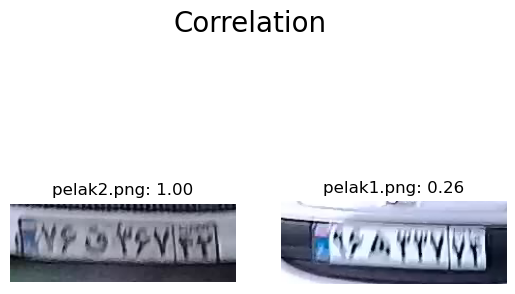

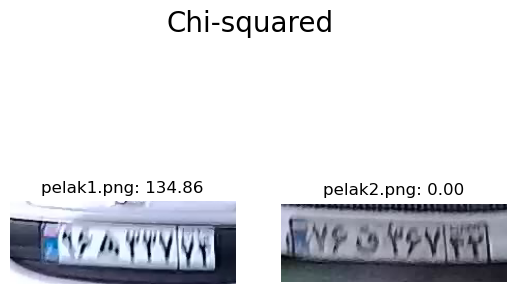

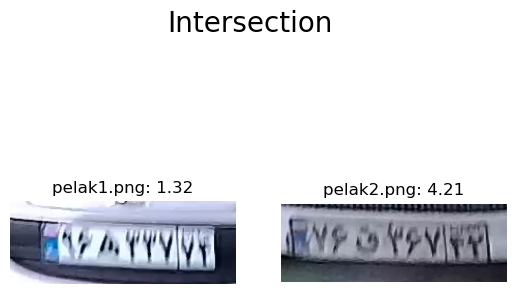

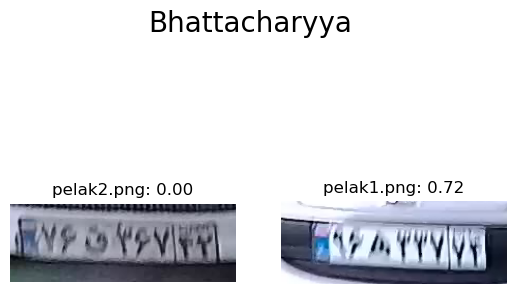

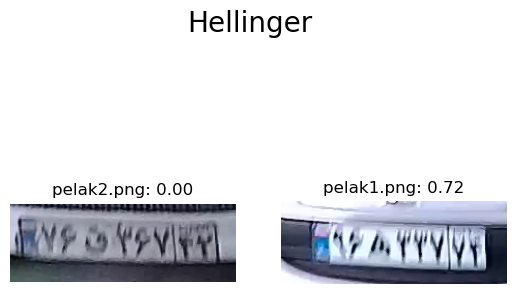

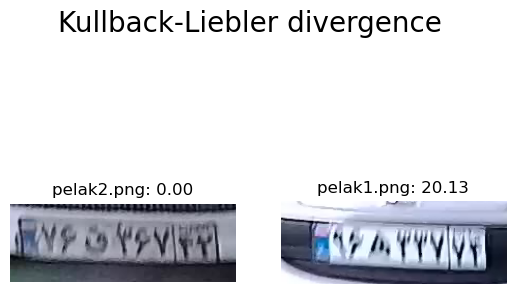

In [6]:
import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from operator import itemgetter

images = {}
index = {}
OPENCV_METHODS = (("Correlation",cv2.HISTCMP_CORREL),("Chi-squared",cv2.HISTCMP_CHISQR)
                 ,("Intersection",cv2.HISTCMP_INTERSECT),("Bhattacharyya",cv2.HISTCMP_BHATTACHARYYA)
                 ,("Hellinger",cv2.HISTCMP_HELLINGER),("Kullback-Liebler divergence",cv2.HISTCMP_KL_DIV))
for imagePath in glob.glob("C:\\Users\\Admin\\OpenCv\\pelak*.png"):
    fileName = imagePath[imagePath.rfind("pelak"):]
    image = cv2.imread(imagePath)
    images[fileName]=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[16,16,16],[0,255,0,255,0,255])
    hist = cv2.normalize(hist,hist).flatten()
    #print(hist.shape)
    index[fileName] = hist
    
for (methodName,method) in  OPENCV_METHODS:
    result = {}
    reverse = False
    if methodName in ("Correlation","Chi-squared"):
        reverse = True
    for (k, hist) in index.items():
        d = cv2.compareHist(index["pelak2.png"],hist,method)
        result[k] = d
    result = sorted([(v,k) for (k,v) in result.items()],reverse = reverse)
   # result = sorted(result,key = itemgetter())
    fig = plt.figure("Results: %s"%(methodName))
    fig.suptitle(methodName,fontsize = 20)
    for (i,(v,k)) in enumerate (result):
        ax = fig.add_subplot(1,len(images),i+1)
        ax.set_title("%s: %.2f"%(k,v))
        plt.imshow(images[k])
        plt.axis("off")
    plt.show()    
    

# فاصله یابی برداری

این روش بر اساس محاسبه فاصله درایه های نظیربه نظیر دو بردار عمل میشود ومعروف ترین آن فاصله یابی اقلیدسی است

دو روش دیگر فاصله یابی منهتن و چپی شف است

# from   scipy.spatial   import   distance   as   dist

در این روش نیز هیستوگرام ها را باید نرمالایز کرد سپس تبدیل به وکتور کرد

value = dist.euclidean(h1,h2)      اقلیدسی : محاسبه جذر ،مجموع،تفاضل های درایه های نظیر به نظیربه توان 2
    
  value = dist.cityblock(h1,h2)   منهتن:مجموع،قدرمطلق تفاضل درایه های نظیر به نظیر
        
  value = dist.chebyshev(h1,h2)    چپی شف:ماکزیمم،قدر مطلق تفاضل درایه های نظیر به نظیر
  
  

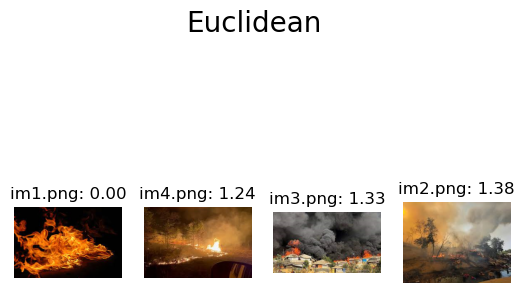

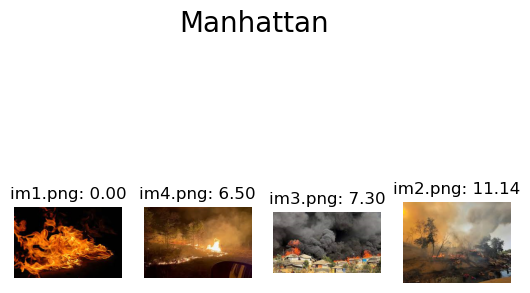

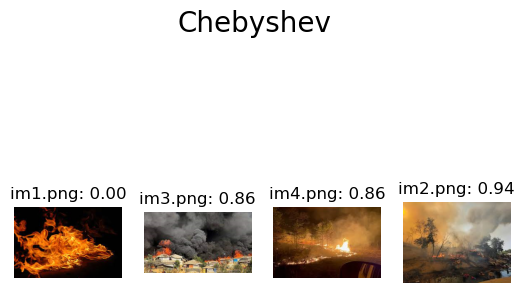

In [6]:
from scipy.spatial import distance as dist
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

images = {}
index = {}
SCIPY_METHODS = (("Euclidean",dist.euclidean),("Manhattan",dist.cityblock),("Chebyshev",dist.chebyshev))

for imagePath in glob.glob("C:\\Users\\NSC\\Pictures\\Fire\\im*.png"):
    fileName = imagePath[imagePath.rfind("im"):]
    image = cv2.imread(imagePath)
    images[fileName]=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[16,16,16],[0,255,0,255,0,255])
    hist = cv2.normalize(hist,hist).flatten()
    index[fileName] = hist
    
for (methodName,method) in  SCIPY_METHODS:
    result = {}
    for (k, hist) in index.items():
        d = method(index["im1.png"],hist)
        result[k] = d
    result = sorted([(v,k) for (k,v) in result.items()])
    
    fig = plt.figure("Results: %s"%(methodName))
    fig.suptitle(methodName,fontsize = 20)
    for (i,(v,k)) in enumerate (result):
        ax = fig.add_subplot(1,len(images),i+1)
        ax.set_title("%s: %.2f"%(k,v))
        plt.imshow(images[k])
        plt.axis("off")
    plt.show()    
        

# plot محاسبه هیستوگرام با 

# plt.hist(img.ravel(),256) هیستوگرام تک کاناله با فلت کردن تصویر

plt.show()  استplt.plot نمایش هیستوگرام با 

plt.imshow(img)  استplt.imshow  نمایش تصویر با

In [19]:
import os
dirsv = 'session-3'
A='H'
for i in range(len(os.listdir(f"{dirsv}/{A}"))):
    print( os.listdir(f"{dirsv}/{A}")[i])

15.txt
16.txt
